# Lab 8: Define and Solve an ML Problem of Your Choosing

In [36]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [37]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(airbnbDataSet_filename)

df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


In [38]:
df.columns.tolist()

['name',
 'description',
 'neighborhood_overview',
 'host_name',
 'host_location',
 'host_about',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_listings_count',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_group_cleansed',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'review_scores_rating',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'calculated_host_listings_count',
 'cal

In [39]:
df['price']

0         150.0
1          75.0
2         275.0
3          68.0
4          75.0
          ...  
28017      89.0
28018    1000.0
28019      64.0
28020      84.0
28021      70.0
Name: price, Length: 28022, dtype: float64

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

I have chosen to use the airbnb data. 

I will be predicting the number of reviews a listing has. 
The label wil be 'number_of_reviews'

This will be a regression problem and it will use supervised learning.

The features will be the rest of the data from the dataset.

This is an important problem because by predicting the number of reviews it can provide insight into the popularity and demand for a specific listing and can help manage how you want to move forward with marketing for that specific listing. 

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [40]:
df.shape

(28022, 50)

In [41]:
df['number_of_reviews'].unique()[:15]

array([ 48, 409,   2, 507, 118, 204, 181, 234,   9, 280, 139,  58,  43,
        98,  77])

In [42]:
import scipy.stats as stats

df['label_number_of_reviews'] = stats.mstats.winsorize(df['number_of_reviews'],[.01,.01])

In [43]:
(df['number_of_reviews'] - df['label_number_of_reviews']).unique()

array([  0, 140, 238,  11,  41, 160,   5, 207,  24, 228,  68,  27, 309,
        39,  53,   6, 131, 158,  26,   1, 203,  23, 210, 107,  43,  51,
        16, 109,  14,  18,   8, 138,  62, 211, 283, 268,  35,   4, 221,
         9,  42, 116, 134,  40,  21,  29,  64, 154,  83,   7, 276,  37,
        44,  12,  76, 341, 104,  17,  28,  49, 114,  19,  15,  59,  88,
        46, 123,  55,  25, 259,  45, 110,  73,   2,  79, 345,   3, 177,
        80,  93, 136, 137, 135,  13, 130,  87,  94, 120, 272, 156,  63,
        74,  82,  69,  66, 126, 278, 125, 122, 186,  65,  34, 171,  58,
        90,  50,  91, 146,  75,  60,  32,  22, 400,  52,  78,  67,  30,
        47, 112,  31,  71, 408, 113, 152,  81, 279, 180, 187, 185, 100,
        84, 168,  10,  48, 258,  57, 204, 115, 159, 133,  38, 740, 319,
       312, 183, 469, 348, 499, 449, 106])

In [44]:
nan_count = np.sum(df.isnull(), axis=0)
nan_count

name                                                5
description                                       570
neighborhood_overview                            9816
host_name                                           0
host_location                                      60
host_about                                      10945
host_response_rate                              11843
host_acceptance_rate                            11113
host_is_superhost                                   0
host_listings_count                                 0
host_total_listings_count                           0
host_has_profile_pic                                0
host_identity_verified                              0
neighbourhood_group_cleansed                        0
room_type                                           0
accommodates                                        0
bathrooms                                           0
bedrooms                                         2918
beds                        

In [45]:
nan_cols = nan_count != 0
nan_cols

name                                             True
description                                      True
neighborhood_overview                            True
host_name                                       False
host_location                                    True
host_about                                       True
host_response_rate                               True
host_acceptance_rate                             True
host_is_superhost                               False
host_listings_count                             False
host_total_listings_count                       False
host_has_profile_pic                            False
host_identity_verified                          False
neighbourhood_group_cleansed                    False
room_type                                       False
accommodates                                    False
bathrooms                                       False
bedrooms                                         True
beds                        

In [46]:
is_int_or_float = (df.dtypes == 'int64') | (df.dtypes == 'float64')
is_int_or_float

name                                            False
description                                     False
neighborhood_overview                           False
host_name                                       False
host_location                                   False
host_about                                      False
host_response_rate                               True
host_acceptance_rate                             True
host_is_superhost                               False
host_listings_count                              True
host_total_listings_count                        True
host_has_profile_pic                            False
host_identity_verified                          False
neighbourhood_group_cleansed                    False
room_type                                       False
accommodates                                     True
bathrooms                                        True
bedrooms                                         True
beds                        

In [47]:
to_impute = nan_cols & is_int_or_float
to_impute

name                                            False
description                                     False
neighborhood_overview                           False
host_name                                       False
host_location                                   False
host_about                                      False
host_response_rate                               True
host_acceptance_rate                             True
host_is_superhost                               False
host_listings_count                             False
host_total_listings_count                       False
host_has_profile_pic                            False
host_identity_verified                          False
neighbourhood_group_cleansed                    False
room_type                                       False
accommodates                                    False
bathrooms                                       False
bedrooms                                         True
beds                        

In [48]:
to_impute = df.columns[to_impute]

In [49]:
for colname in to_impute:
    df[colname +'_na'] = df[colname].isnull()
df.columns

Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_location', 'host_about', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',

In [50]:
for colname in to_impute:
    df[colname].fillna(np.mean(df[colname]), inplace=True)

In [51]:
for colname in to_impute:
    print("{} missing values count :{}".format(colname, np.sum(df[colname].isnull(), axis = 0)))

host_response_rate missing values count :0
host_acceptance_rate missing values count :0
bedrooms missing values count :0
beds missing values count :0


In [52]:
df.drop('number_of_reviews', inplace=True, axis=1)

In [53]:
df.dropna(inplace=True, axis=1)

In [54]:
df.drop(['host_response_rate_na', 'host_acceptance_rate_na', 'bedrooms_na','beds_na'], inplace=True, axis=1)

In [55]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [56]:
df_room_type = pd.get_dummies(df['room_type'],prefix='room_type_')
df_room_type

,room_type__Entire home/apt,room_type__Hotel room,room_type__Private room,room_type__Shared room
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
28017,0,0,1,0
28018,1,0,0,0
28019,0,0,1,0
28020,1,0,0,0


In [57]:
# Join One Hot encoded columns
df = df.join(df_room_type)
# Remove the original column from DataFrame df
df.drop(columns = 'room_type', inplace=True)

In [58]:
df['neighbourhood_group_cleansed'].unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [59]:
df_neihborhood_group = pd.get_dummies(df['neighbourhood_group_cleansed'],prefix='neighbourhood_group_')

# Join One Hot encoded columns
df = df.join(df_neihborhood_group)
# Remove the original column from DataFrame df
df.drop(columns = 'neighbourhood_group_cleansed', inplace=True)

In [61]:
# Find columns that have object data types
non_numeric_cols = df.select_dtypes(include=['object','bool']).columns

In [62]:
df.drop(columns=non_numeric_cols, inplace=True, axis=1)

In [63]:
df.columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_listings_count',
       'host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'n_host_verifications', 'label_number_of_reviews',
      

In [64]:
corr_matrix = round(df.corr(),5)
corr_matrix

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,label_number_of_reviews,room_type__Entire home/apt,room_type__Hotel room,room_type__Private room,room_type__Shared room,neighbourhood_group__Bronx,neighbourhood_group__Brooklyn,neighbourhood_group__Manhattan,neighbourhood_group__Queens,neighbourhood_group__Staten Island
host_response_rate,1.00000,0.42738,0.04103,0.04103,0.02200,0.01969,0.01447,0.02034,0.00542,-0.09917,...,0.06895,0.02917,-0.01695,-0.02177,-0.02203,0.02224,0.01739,-0.04979,0.03067,0.01489
host_acceptance_rate,0.42738,1.00000,0.04082,0.04082,0.05188,-0.00282,0.01719,0.03218,0.03127,-0.12175,...,0.09630,-0.00553,0.03770,0.00182,-0.00678,0.02646,-0.03139,-0.01014,0.04209,0.01146
host_listings_count,0.04103,0.04082,1.00000,1.00000,-0.00390,0.01326,-0.00432,-0.01487,0.08099,0.02302,...,-0.05193,0.02274,-0.00005,-0.02028,-0.01098,-0.00165,-0.07464,0.08258,-0.00814,-0.00975
host_total_listings_count,0.04103,0.04082,1.00000,1.00000,-0.00390,0.01326,-0.00432,-0.01487,0.08099,0.02302,...,-0.05193,0.02274,-0.00005,-0.02028,-0.01098,-0.00165,-0.07464,0.08258,-0.00814,-0.00975
accommodates,0.02200,0.05188,-0.00390,-0.00390,1.00000,0.36944,0.72124,0.75362,0.51906,-0.06150,...,0.07434,0.45266,-0.01507,-0.43853,-0.06092,-0.00831,0.02700,-0.02531,-0.00212,0.01391
bathrooms,0.01969,-0.00282,0.01326,0.01326,0.36944,1.00000,0.47263,0.37708,0.33130,-0.01273,...,-0.03430,0.03139,-0.01759,-0.02880,-0.00112,-0.02246,0.07051,-0.04493,-0.02558,0.00349
bedrooms,0.01447,0.01719,-0.00432,-0.00432,0.72124,0.47263,1.00000,0.73367,0.45717,-0.02905,...,0.00704,0.35617,-0.02895,-0.34022,-0.05829,-0.01290,0.05630,-0.05188,-0.00440,0.01698
beds,0.02034,0.03218,-0.01487,-0.01487,0.75362,0.37708,0.73367,1.00000,0.40033,-0.05026,...,0.07764,0.32859,-0.01577,-0.33164,0.01555,0.00706,0.02173,-0.05817,0.03781,0.03571
price,0.00542,0.03127,0.08099,0.08099,0.51906,0.33130,0.45717,0.40033,1.00000,-0.07995,...,-0.03524,0.34690,0.12791,-0.35546,-0.04794,-0.07212,-0.11197,0.23764,-0.13210,-0.03698
minimum_nights,-0.09917,-0.12175,0.02302,0.02302,-0.06150,-0.01273,-0.02905,-0.05026,-0.07995,1.00000,...,-0.14410,0.04911,-0.03599,-0.04155,-0.01163,-0.04853,-0.01603,0.08125,-0.05957,-0.03068


In [65]:
corrs = corr_matrix['label_number_of_reviews']
corrs

host_response_rate                              0.06895
host_acceptance_rate                            0.09630
host_listings_count                            -0.05193
host_total_listings_count                      -0.05193
accommodates                                    0.07434
bathrooms                                      -0.03430
bedrooms                                        0.00704
beds                                            0.07764
price                                          -0.03524
minimum_nights                                 -0.14410
maximum_nights                                 -0.00333
minimum_minimum_nights                         -0.13985
maximum_minimum_nights                         -0.11058
minimum_maximum_nights                         -0.00905
maximum_maximum_nights                         -0.00406
minimum_nights_avg_ntm                         -0.11332
maximum_nights_avg_ntm                         -0.00743
availability_30                                 

In [66]:
corrs_sorted = corrs.sort_values(ascending=False)
corrs_sorted

label_number_of_reviews                         1.00000
number_of_reviews_ltm                           0.48520
number_of_reviews_l30d                          0.33155
reviews_per_month                               0.24839
availability_365                                0.14342
availability_90                                 0.11729
review_scores_cleanliness                       0.11188
host_acceptance_rate                            0.09630
review_scores_value                             0.08866
availability_60                                 0.08432
review_scores_checkin                           0.07919
review_scores_communication                     0.07885
beds                                            0.07764
n_host_verifications                            0.07696
accommodates                                    0.07434
review_scores_rating                            0.07364
host_response_rate                              0.06895
neighbourhood_group__Queens                     

In [67]:
top_two_corr = list(corrs_sorted[2:4].index)
top_two_corr

['number_of_reviews_l30d', 'reviews_per_month']

In [68]:
low_corr = corrs_sorted[(corrs_sorted.abs() < 0.03) & (corrs_sorted.abs() > -0.03)]

# Get column names
low_corr_column_names = low_corr.index.tolist()
low_corr_column_names

['neighbourhood_group__Staten Island',
 'neighbourhood_group__Bronx',
 'room_type__Hotel room',
 'room_type__Entire home/apt',
 'review_scores_location',
 'bedrooms',
 'availability_30',
 'maximum_nights',
 'maximum_maximum_nights',
 'calculated_host_listings_count_shared_rooms',
 'room_type__Shared room',
 'maximum_nights_avg_ntm',
 'minimum_maximum_nights',
 'room_type__Private room']

In [69]:
# Drop low correlation features
df.drop(columns=low_corr_column_names, axis=1, inplace=True)

In [70]:
df_corrs = df[top_two_corr].copy()
df_corrs['label_number_of_reviews'] = df['label_number_of_reviews']
df_corrs

,number_of_reviews_l30d,reviews_per_month,label_number_of_reviews
0,0,0.33,48
1,0,4.86,269
2,0,0.02,2
3,2,3.68,269
4,0,0.87,118
...,...,...,...
28017,1,1.00,1
28018,2,2.00,2
28019,1,1.00,1
28020,1,1.00,1


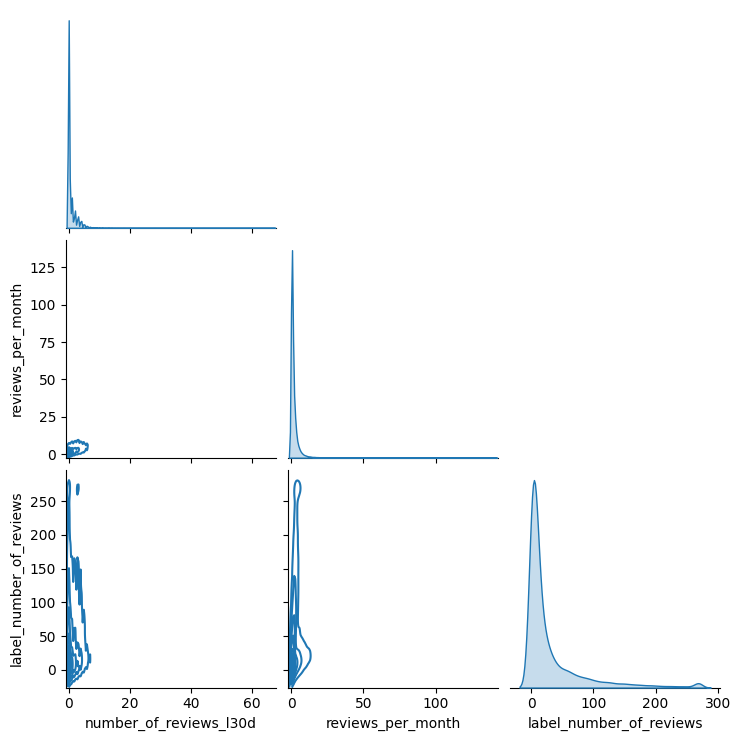

In [71]:
sns.pairplot(data=df_corrs, kind = 'kde', corner=True)

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

The features that I am using are the rest of the columns that did not have any empty values. I am also removing features that have a correlation less than 3 percent. I also will remove all the columns that are not integers. 

I utilized winsorization to help with the outliers in the label. I also utilized one hot encoding for the room type and the neighborhood. 

The models I will be using are linear regression and a decision tree. I will be utilizing grid search to find the best parameters for the models. I will also be splitting data model into training and testing and utilizing mean squared error to determine accuracy. Finally I will implement a random forest just to test which model performs the best and practice with ensemble methods. 

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [72]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [73]:
df.head()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,beds,price,minimum_nights,minimum_minimum_nights,...,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month,n_host_verifications,label_number_of_reviews,neighbourhood_group__Brooklyn,neighbourhood_group__Manhattan,neighbourhood_group__Queens
0,0.800000,0.170000,8.0,8.0,1,1.0,1.0,150.0,30,30.0,...,4.41,3,3,0,0.33,9,48,0,1,0
1,0.090000,0.690000,1.0,1.0,3,1.0,3.0,75.0,1,1.0,...,4.64,1,1,0,4.86,6,269,1,0,0
2,1.000000,0.250000,1.0,1.0,4,1.5,2.0,275.0,5,5.0,...,5.00,1,1,0,0.02,3,2,1,0,0
3,1.000000,1.000000,1.0,1.0,2,1.0,1.0,68.0,2,2.0,...,4.36,1,0,1,3.68,4,269,0,1,0
4,0.906901,0.791953,1.0,1.0,1,1.0,1.0,75.0,2,2.0,...,4.92,1,0,1,0.87,7,118,0,1,0


In [74]:
y = df['label_number_of_reviews']
X = df.drop(columns='label_number_of_reviews', axis=1)

In [75]:
y.head()

0     48
1    269
2      2
3    269
4    118
Name: label_number_of_reviews, dtype: int64

In [76]:
X.columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_listings_count',
       'host_total_listings_count', 'accommodates', 'bathrooms', 'beds',
       'price', 'minimum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_nights_avg_ntm', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_value',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms', 'reviews_per_month',
       'n_host_verifications', 'neighbourhood_group__Brooklyn',
       'neighbourhood_group__Manhattan', 'neighbourhood_group__Queens'],
      dtype='object')

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.10, random_state=1234)

In [78]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (25219, 30)
X_test: (2803, 30)
y_train: (25219,)
y_test: (2803,)


In [79]:
# 1. Create the model object below and assign to variable 'lr_model'
lr_model = LinearRegression()

# 2. Fit the model to the training data below
lr_model.fit(X_train, y_train)

LinearRegression()

In [80]:
# Make Predictions
y_lr_pred = lr_model.predict(X_test)

In [81]:
# Get Accuracy scores
lr_rmse = mean_squared_error(y_test, y_lr_pred, squared=False)

lr_r2 = r2_score(y_test, y_lr_pred)
print('[LR] Root Mean Squared Error: {0}'.format(lr_rmse))
print('[LR] R2: {0}'.format(lr_r2))

[LR] Root Mean Squared Error: 43.53466530290396
[LR] R2: 0.29483298140555214


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [82]:
# Create Param Grid
md = [4, 8, 12, 16, 20]
msl = [25, 50, 75, 100]
param_grid={'max_depth':md, 'min_samples_leaf':msl}

In [83]:
# Run Grid Search
print('Running Grid Search...')

# 1. Create a DecisionTreeRegressor model object without supplying arguments.
dt_regressor = DecisionTreeRegressor()

# 2. Run a Grid Search with 3-fold cross-validation and assign the output to
dt_grid = GridSearchCV(dt_regressor, param_grid, cv=3, scoring='neg_root_mean_squared_error', verbose=1)

# 3. Fit the model (use the 'grid' variable) on the training data and assign the fitted model to the
dt_grid_search = dt_grid.fit(X_train, y_train)

print('Done')

Running Grid Search...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Done


In [84]:
rmse_DT = -1 * dt_grid_search.best_score_
print("[DT] RMSE for the best model is : {:.2f}".format(rmse_DT) )

[DT] RMSE for the best model is : 28.59


In [85]:
dt_best_params = dt_grid_search.best_params_
dt_best_params

{'max_depth': 12, 'min_samples_leaf': 25}

In [86]:
dt_model = DecisionTreeRegressor(max_depth = dt_best_params['max_depth'], min_samples_leaf = dt_best_params['min_samples_leaf'])
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=12, min_samples_leaf=25)

In [87]:
y_dt_pred = dt_model.predict(X_test)

# 2. Compute the RMSE using mean_squared_error()
dt_rmse = mean_squared_error(y_test, y_dt_pred, squared=False)

# 3. Compute the R2 score using r2_score()
dt_r2 = r2_score(y_test, y_dt_pred)
print('[DT] Root Mean Squared Error: {0}'.format(dt_rmse))
print('[DT] R2: {0}'.format(dt_r2))

[DT] Root Mean Squared Error: 28.039549533463
[DT] R2: 0.7074745633330437


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [88]:
print('Begin RF Implementation...')

rf_model = RandomForestRegressor(max_depth = 32, n_estimators = 300)
rf_model.fit(X_train, y_train)

print('End')

Begin RF Implementation...
End


In [89]:
# Make Predictions
y_rf_pred = rf_model.predict(X_test)

# Compute R2 and MSE
rf_rmse = mean_squared_error(y_test, y_rf_pred, squared=False)
rf_r2 = r2_score(y_test, y_rf_pred)
print('[RF] Root Mean Squared Error: {0}'.format(rf_rmse))
print('[RF] R2: {0}'.format(rf_r2))

[RF] Root Mean Squared Error: 23.19208998432824
[RF] R2: 0.7998749992168656


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
